In [4]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys
import statistics as stats

In [5]:
#importing movie_budgets_clean.csv
movie_budgets_clean= pd.read_csv('databases/movie_budgets_clean.csv')

In [6]:
#checking for null values and datatypes
movie_budgets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5234 non-null   int64 
 1   release_date       5234 non-null   object
 2   movie              5234 non-null   object
 3   production_budget  5234 non-null   int64 
 4   domestic_gross     5234 non-null   int64 
 5   worldwide_gross    5234 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 245.5+ KB


In [7]:
#adding column 'profit' for each movies total profit
movie_budgets_clean['profit'] = movie_budgets_clean['worldwide_gross'] - movie_budgets_clean['production_budget']


In [8]:
#calculate the return on investment(ROI) for each movie
movie_budgets_clean['roi'] = (movie_budgets_clean['worldwide_gross'] / movie_budgets_clean['production_budget'] ) -1

In [9]:
#checkpoint to inspect data with additional columns
movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [10]:
#Evaluating descriptive statistics, mean is much higher then median for profit
# and ROI so we will remove outliers
movie_budgets_clean.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,roi
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,6.672803e+07,4.267876
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,1.518522e+08,30.997659
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,-2.002376e+08,-0.999875
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,-1.396634e+06,-0.241161
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,1.357260e+07,0.961653
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,7.088258e+07,3.059457
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,1799.000000


In [11]:
#remove outliers, any data below 2 standard deviations from the median are removed
movie_budgets_outliers = movie_budgets_clean[movie_budgets_clean['roi'] < 0.961653 + (2*30.997659)] 

In [12]:
#removing outliers from worldwide_gross column using the same method
movie_budgets_outliers = movie_budgets_clean[movie_budgets_clean['worldwide_gross'] < 3.543844e+07+(2*1.811226e+08) ]

In [13]:
#removing any production budget below $10M as we assume that Microsoft will spend at least that
movie_budgets_outliers = movie_budgets_clean[movie_budgets_clean['production_budget'] > 100000000]

In [38]:
movie_budgets_outliers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


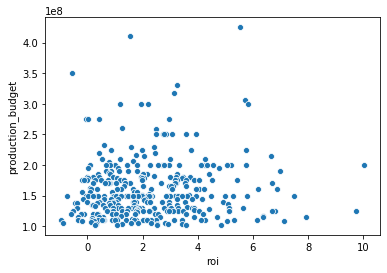

In [14]:
sns.scatterplot(x= movie_budgets_outliers['roi'], y= movie_budgets_outliers['production_budget']);

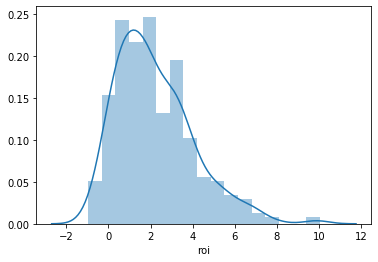

In [15]:
x = np.random.normal(size=100)
sns.distplot(movie_budgets_outliers['roi'])

In [28]:
def mean_normalize(var):

    norm = [] # Vector for storing output values 
    
    mean = sum(var)/len(var)
        
    # for each element in the vector, subtract from mean and add the result to norm
    for i in var:
        diff = i - mean
        norm.append(diff)
    
    return norm

In [29]:
mean_normalize(movie_budgets_outliers['roi'])
mean_normalize(movie_budgets_outliers['production_budget'])

[266474861.87845305,
 252074861.87845305,
 191474861.87845305,
 172074861.87845305,
 158474861.87845305,
 147474861.87845305,
 141474861.87845305,
 141474861.87845305,
 141474861.87845305,
 141474861.87845305,
 116474861.87845305,
 116474861.87845305,
 116474861.87845305,
 116474861.87845305,
 101474861.87845305,
 99474861.87845305,
 91474861.87845305,
 91474861.87845305,
 91474861.87845305,
 91474861.87845305,
 91474861.87845305,
 91474861.87845305,
 91474861.87845305,
 73474861.87845305,
 71474861.87845305,
 71474861.87845305,
 66474861.878453046,
 66474861.878453046,
 66474861.878453046,
 66474861.878453046,
 61474861.878453046,
 61474861.878453046,
 58474861.878453046,
 56474861.878453046,
 56474861.878453046,
 51474861.878453046,
 51474861.878453046,
 51474861.878453046,
 51474861.878453046,
 48474861.878453046,
 46474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41474861.878453046,
 41

In [30]:
roi_normalized = mean_normalize(movie_budgets_outliers['roi'])
production_budget_normalized = mean_normalize(movie_budgets_outliers['production_budget'])

In [32]:
def dot_product(x, y):

    prod_vec = 0 # Initliaze an empty list to store the results 
    
    # For all elements in the vectors, multiply and save results in prod_vec
    for i in range(len(x)):
        prod = x[i]* y[i]
        prod_vec += prod
        

    return prod_vec

a = movie_budgets_outliers['roi']
b = movie_budgets_outliers['production_budget']

dot_product(a, b)

129350596286.0

In [36]:
def covariance(var1, var2):

    # Formula for covariance is:
    # [Sum (x_i - X)(y_i - Y)] / N-1 

    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        # Mean normalize both variables 
        x = mean_normalize(var1)
        y = mean_normalize(var2)
        
        # Take the dot product of mean normalized variables
        result = dot_product(x, y)

        # divide the dot product by n-1    
        return result /((len(var1)) - 1)


covariance(movie_budgets_outliers['roi'], movie_budgets_outliers['production_budget'])

7994308.750853862

In [37]:
import math
def correlation(var1, var2):
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

correlation(movie_budgets_outliers['roi'], movie_budgets_outliers['production_budget'])

0.09